## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Algorithms
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv('/content/exams.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print(data['gender'].unique())
gender_dict={'female':0,"male":1}
print(data['race/ethnicity'].unique())
race_dict={'group B':2, 'group C':3, 'group A':4, 'group D':1, 'group E':0}
print(data['parent_education_level'].unique())
parent_educt_dict ={"bachelor's degree":2, 'some college':1, "master's degree":3, "associate's degree":1
 ,'high school':0, 'some high school':0}
print(data['lunch'].unique())
luch_dict ={'standard':0,"free/reduced":1}
print(data['test_prep_course'].unique())
test_prep_dict={'none':0,'completed':1}


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


##1. What are the average reading scores for students with/without the test preparation course?


In [5]:
data1= data
avg_reading_score =data1[['reading','test_prep_course']].groupby(by='test_prep_course').mean()
avg_reading_score=avg_reading_score.reset_index()
avg_reading_score

,test_prep_course,reading
0,completed,73.893855
1,none,66.534268


##2. What are the average scores for the different parental education levels?


In [6]:
data2 = data
parent_education = data2.groupby(by='parent_education_level').mean()
parent_education = parent_education.reset_index()
parent_education['total_avg'] =parent_education[['math','reading','writing']].mean(axis=1)
parent_education

,parent_education_level,math,reading,writing,total_avg
0,associate's degree,67.882883,70.927928,69.896396,69.569069
1,bachelor's degree,69.389831,73.000000,73.381356,71.923729
2,high school,62.137755,64.704082,62.448980,63.096939
3,master's degree,69.745763,75.372881,75.677966,73.598870
4,some college,67.128319,69.460177,68.840708,68.476401
5,some high school,63.497207,66.938547,64.888268,65.108007


In [7]:
parent_education

,parent_education_level,math,reading,writing,total_avg
0,associate's degree,67.882883,70.927928,69.896396,69.569069
1,bachelor's degree,69.389831,73.000000,73.381356,71.923729
2,high school,62.137755,64.704082,62.448980,63.096939
3,master's degree,69.745763,75.372881,75.677966,73.598870
4,some college,67.128319,69.460177,68.840708,68.476401
5,some high school,63.497207,66.938547,64.888268,65.108007


#3. Create plots to visualize findings for questions 1 and 2.

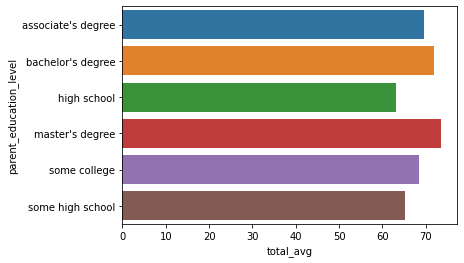

In [8]:
sns.barplot(data=parent_education,x='total_avg',y='parent_education_level')

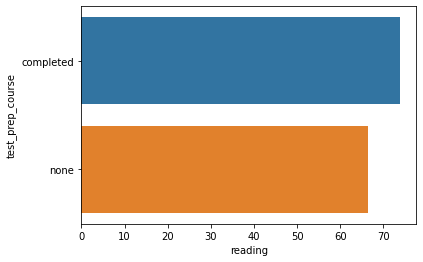

In [9]:
sns.barplot(data=avg_reading_score,x='reading',y='test_prep_course')

#4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [10]:
data3= data
data3 = data3.groupby(by=['test_prep_course','parent_education_level']).mean().reset_index()
data3['total_avg'] =data3[['math','reading','writing']].mean(axis=1)
data3

,test_prep_course,parent_education_level,math,reading,writing,total_avg
0,completed,associate's degree,71.829268,76.170732,76.817073,74.939024
1,completed,bachelor's degree,73.282609,76.739130,78.695652,76.239130
2,completed,high school,65.000000,67.839286,68.053571,66.964286
3,completed,master's degree,70.600000,78.250000,80.100000,76.316667
4,completed,some college,71.454545,75.987013,76.519481,74.653680
5,completed,some high school,66.701299,70.948052,70.363636,69.337662
6,none,associate's degree,65.571429,67.857143,65.842857,66.423810
7,none,bachelor's degree,66.902778,70.611111,69.986111,69.166667
8,none,high school,60.992857,63.450000,60.207143,61.550000
9,none,master's degree,69.307692,73.897436,73.410256,72.205128


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


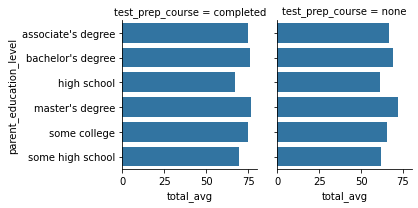

In [11]:
# Initialize a grid of plots with an Axes for each walk
g =sns.FacetGrid(data3,  col='test_prep_course' )
g.map(sns.barplot, 'total_avg',"parent_education_level")

#5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 


In [12]:
data4=data[['reading','writing','math']]

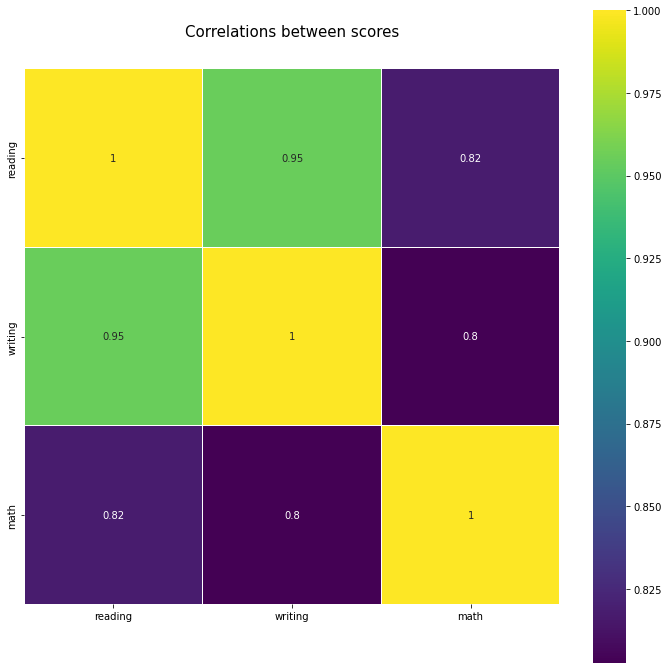

In [13]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlations between scores', y=1.05, size=15)
sns.heatmap(data4.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#Predict which feature is important for score of students by machine learning.

In [14]:
data5=data
print(data['gender'].unique())
gender_dict={'female':0,"male":1}
print(data['race/ethnicity'].unique())
race_dict={'group B':2, 'group C':3, 'group A':4, 'group D':1, 'group E':0}
print(data['parent_education_level'].unique())
parent_educt_dict ={"bachelor's degree":2, 'some college':1, "master's degree":3, "associate's degree":1
 ,'high school':0, 'some high school':0}
print(data['lunch'].unique())
luch_dict ={'standard':1,"free/reduced":0}
print(data['test_prep_course'].unique())
test_prep_dict={'none':0,'completed':1}


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [15]:
data5['gender']=data5['gender'].map(gender_dict)
data5['race/ethnicity'] =data5['race/ethnicity'].map(race_dict)
data5['parent_education_level']=data5['parent_education_level'].map(parent_educt_dict)
data5['lunch'] =data5['lunch'].map(luch_dict)
data5['test_prep_course'] = data5['test_prep_course'].map(test_prep_dict)


In [16]:
print(data5.info())
print(data5['gender'].value_counts())
print(data5['race/ethnicity'].value_counts())
print(data5['parent_education_level'].value_counts())
print(data5['lunch'].value_counts())
print(data5['test_prep_course'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  1000 non-null   int64
 1   race/ethnicity          1000 non-null   int64
 2   parent_education_level  1000 non-null   int64
 3   lunch                   1000 non-null   int64
 4   test_prep_course        1000 non-null   int64
 5   math                    1000 non-null   int64
 6   reading                 1000 non-null   int64
 7   writing                 1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB
None
0    518
1    482
Name: gender, dtype: int64
3    319
1    262
2    190
0    140
4     89
Name: race/ethnicity, dtype: int64
1    448
0    375
2    118
3     59
Name: parent_education_level, dtype: int64
1    645
0    355
Name: lunch, dtype: int64
0    642
1    358
Name: test_prep_course, dtype: int64


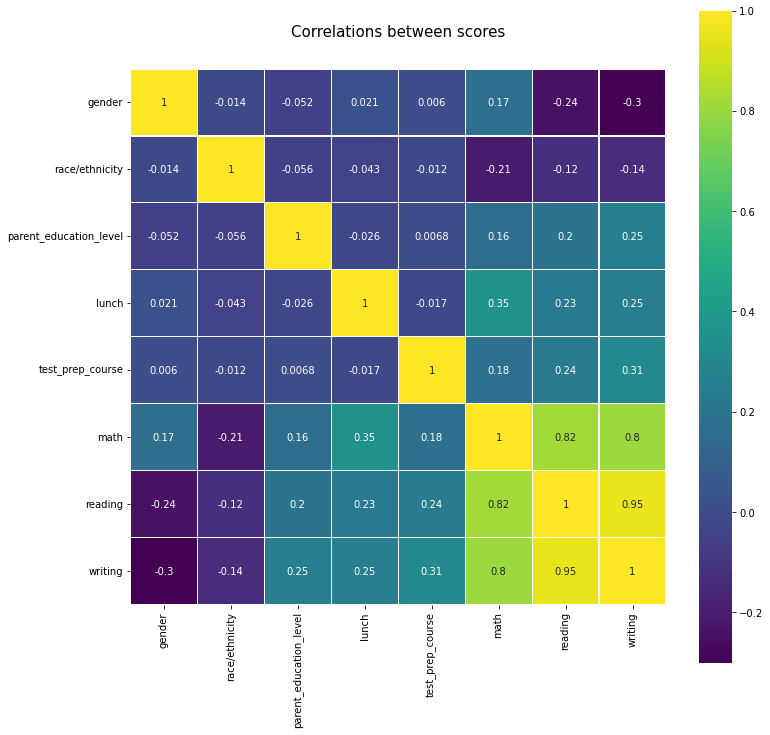

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlations between scores', y=1.05, size=15)
sns.heatmap(data5.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [35]:
test_df = data5
test_df['total_avg'] =test_df[['math','reading','writing']].mean(axis=1).astype(int)
X = test_df.drop('total_avg', axis=1)
y= test_df['total_avg']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [36]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


5.52

In [39]:
reg = linear_model.Lasso()
reg.fit(X_train,y_train)
reg.predict(X_test)
reg_log = round(reg.score(X_train, y_train) * 100, 2)
reg_log

99.96

In [55]:
result = reg.predict(X_test)
compare = pd.DataFrame(y_test)
compare = compare.reset_index(drop=True)
compare['result'] =result
compare

,total_avg,result
0,87,86.572842
1,64,63.691275
2,75,74.633433
3,74,74.292168
4,81,81.258416
...,...,...
325,68,67.658171
326,73,72.635171
327,71,71.307921
328,83,82.922841
